<a href="https://colab.research.google.com/github/syedsajjadaskari/DecisionTreeClassfier/blob/main/LabAssign6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree CLassifier

In [32]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [33]:
datasets = pd.read_csv('Social_Network_Ads.csv')

In [34]:
datasets.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [35]:
df = datasets

In [36]:
#input parameter
X = df[['Age','EstimatedSalary']]

In [37]:
Y = df['Purchased']

In [38]:
df.shape

(400, 5)

In [39]:
X.shape

(400, 2)

In [40]:
Y.shape

(400,)

In [41]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [43]:
X_Train.shape, Y_Train.shape, X_Test.shape, Y_Test.shape

((300, 2), (300,), (100, 2), (100,))

In [46]:
from sklearn.preprocessing import MinMaxScaler


In [55]:
#
SS = MinMaxScaler()

In [56]:
SS.fit(X_Train)

MinMaxScaler()

In [57]:
X_Train_Scaled = SS.transform(X_Train)

In [58]:
X_Test_Scaled = SS.transform(X_Test)

In [59]:
X_Test_Scaled
X_Train_Scaled

array([[0.61904762, 0.17777778],
       [0.33333333, 0.77777778],
       [0.47619048, 0.25925926],
       [0.33333333, 0.88888889],
       [0.80952381, 0.04444444],
       [0.83333333, 0.65925926],
       [0.5       , 0.2       ],
       [0.47619048, 0.34074074],
       [0.42857143, 0.25925926],
       [0.42857143, 0.35555556],
       [0.4047619 , 0.07407407],
       [0.4047619 , 0.25925926],
       [0.57142857, 0.42962963],
       [0.69047619, 0.25185185],
       [0.97619048, 0.1037037 ],
       [0.73809524, 0.37037037],
       [0.64285714, 0.85925926],
       [0.30952381, 0.54814815],
       [0.66666667, 0.4962963 ],
       [0.69047619, 0.26666667],
       [0.19047619, 0.        ],
       [1.        , 0.64444444],
       [0.47619048, 0.71851852],
       [0.52380952, 0.68148148],
       [0.57142857, 0.28148148],
       [0.4047619 , 0.32592593],
       [0.71428571, 0.19259259],
       [0.71428571, 0.88148148],
       [0.47619048, 0.72592593],
       [0.26190476, 0.98518519],
       [0.

In [62]:
# Fitting the classifier into the Training set

from sklearn.tree import DecisionTreeClassifier
model_1 = DecisionTreeClassifier()

model_1.fit(X_Train_Scaled, Y_Train)


DecisionTreeClassifier()

In [63]:
# Predicting the test set results

Y_Pred = model_1.predict(X_Test)

In [70]:
# Making the Confusion Matrix 

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_Test, Y_Pred)
cm

array([[66,  2],
       [ 7, 25]])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


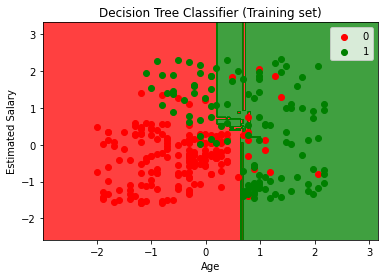

In [79]:
from matplotlib.colors import ListedColormap
X_Set, Y_Set = X_Train, Y_Train
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model_1.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


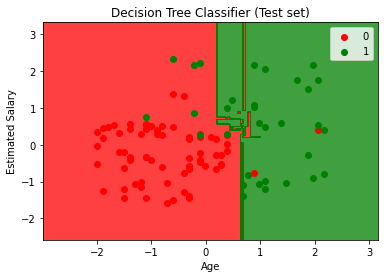

In [75]:
# Visualising the Test set results

from matplotlib.colors import ListedColormap
X_Set, Y_Set = X_Test, Y_Test
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, model_1.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Decision Tree Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()